In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install efficientnet

import tensorflow as tf
import efficientnet.keras as efn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import array_to_img, to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(380, 380, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
y_train = []
x_test = []
y_test = []

base_dir = "/content/drive/MyDrive/SKRIPSI AGHNI/HA-HT/S3"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')

directories_train = [(os.path.join(train_dir, 'HA'), 0),
                     (os.path.join(train_dir, 'HT'), 1)]

directories_test = [(os.path.join(val_dir, 'HA'), 0),
                    (os.path.join(val_dir, 'HT'), 1)]

# Load train images and labels
for directory, label in directories_train:
    images, labels = load_images_from_path(directory, label)
    x_train += images
    y_train += labels

# Load test images and labels
for directory, label in directories_test:
    images, labels = load_images_from_path(directory, label)
    x_test += images
    y_test += labels

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential()
efficient_net = efn.EfficientNetB4(weights="imagenet" , include_top=True, input_shape=(380,380,3))

efficient_net.trainable = False
model.add(efficient_net)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])
model.summary()

loss, acc = model.evaluate(x_test_norm, y_test_encoded, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Mounted at /content/drive


In [ ]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import efficientnet.keras as efn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import array_to_img, to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(380, 380, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
base_dir = "/content/drive/MyDrive/SKRIPSI AGHNI/HA-HT/S3"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')

directories_train = [(os.path.join(train_dir, 'HA'), 0),
                     (os.path.join(train_dir, 'HT'), 1)]

directories_test = [(os.path.join(val_dir, 'HA'), 0),
                    (os.path.join(val_dir, 'HT'), 1)]

# Load train images and labels
for directory, label in directories_train:
    images, labels = load_images_from_path(directory, label)
    x_train += images
    y_train += labels

# Load test images and labels
for directory, label in directories_test:
    images, labels = load_images_from_path(directory, label)
    x_test += images
    y_test += labels


In [ ]:
x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
model = Sequential()
efficient_net = efn.EfficientNetB4(weights="imagenet" , include_top=True, input_shape=(380,380,3))

efficient_net.trainable = False
model.add(efficient_net)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])
model.summary()

78856072/78856072 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functional  (None, 1000)             19466816  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 32)                32032     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 19,501,090
Trainable params: 34,274
Non-tra

In [ ]:
# Melatih model dengan generator data latih
model.fit(x_train_norm, y_train_encoded, batch_size=11, steps_per_epoch=2 ,epochs=20)

Epoch 1/20
2/2 [==============================] - 28s 207ms/step - loss: 0.6930 - accuracy: 0.5909
Epoch 2/20
2/2 [==============================] - 0s 147ms/step - loss: 0.6941 - accuracy: 0.3636
Epoch 3/20
2/2 [==============================] - 0s 153ms/step - loss: 0.6937 - accuracy: 0.4545
Epoch 4/20
2/2 [==============================] - 0s 147ms/step - loss: 0.6941 - accuracy: 0.4091
Epoch 5/20
2/2 [==============================] - 0s 153ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 77ms/step - loss: 0.6936 - accuracy: 0.3846
Epoch 7/20
2/2 [==============================] - 0s 151ms/step - loss: 0.6932 - accuracy: 0.5909
Epoch 8/20
2/2 [==============================] - 0s 155ms/step - loss: 0.6928 - accuracy: 0.6364
Epoch 9/20
2/2 [==============================] - 0s 151ms/step - loss: 0.6925 - accuracy: 0.7727
Epoch 10/20
2/2 [==============================] - 0s 151ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 11/20
2/2 [==

In [ ]:
loss, acc = model.evaluate(x_test_norm, y_test_encoded, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 - 7s - loss: 0.6924 - accuracy: 0.6538 - 7s/epoch - 3s/step
Restored model, accuracy: 65.38%


2/2 [==============================] - 3s 398ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


Text(109.44999999999997, 0.5, 'Actual label')

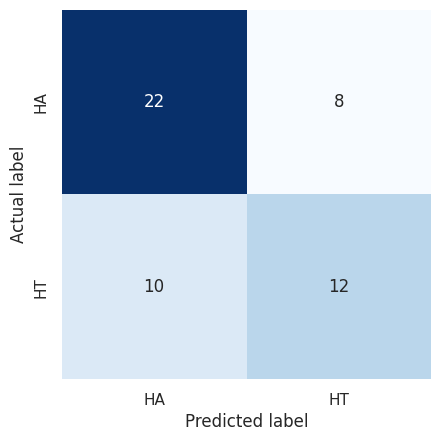

In [ ]:
# Confusion Matrix data test
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['HA','HT']
print(y_test_encoded.argmax(axis=1))
print(y_predicted.argmax(axis=1))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
model.save('HA-HT-S3.h5')